# DFT-ML method to Catching the Phase transition in the 1nn Model

We show how it is possible to catch phase transition by using a Machine Learning Approach to Density Functional Theory

#### Imports

In [3]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from scipy import fft, ifft
from tqdm.notebook import tqdm, trange
from src.training.utils_analysis import dataloader, nuv_representability_check,mean_field_functional_1nn

#### Data

In [16]:
n_sample=5
h_max=[1.0,1.8,2.7,3.6,4.5]
ls=[512]*n_sample
n_instances=[100]*n_sample
epochs = [39900]*n_sample 
# model settings
name_session=[f'h_{h_max[i]}_150k_augmentation_1nn_model_unet_{ls[i]}_size_2_layers_20_hc_5_ks_2_ps' for i in range(n_sample)]
early_stopping=False
variational_lr=False
loglr=1

min_density=[]
gs_density=[]
min_energy=[]
gs_energy=[]
hs=[]

for i in range(n_sample):
    hs.append(np.load(f'data/dataset_1nn/valid_unet_periodic_{ls[i]}_l_{h_max[i]}_h_15000_n.npz')['potential'][0:n_instances[i]])
    min_eng_t,gs_eng_t=dataloader('energy',session_name=name_session[i],n_instances=n_instances[i],lr=loglr,diff_soglia=1,epochs=epochs[i],early_stopping=False,variable_lr=False,n_ensambles=1)
    min_n_t,gs_n_t=dataloader('density',session_name=name_session[i],n_instances=n_instances[i],lr=loglr,diff_soglia=1,epochs=epochs[i],early_stopping=False,variable_lr=False,n_ensambles=1)
    
    min_eng_t=np.asarray(min_eng_t)
    gs_eng_t=np.asarray(gs_eng_t)
    min_n_t=np.asarray(min_n_t)
    gs_n_t=np.asarray(gs_n_t)
    
            #if min_eng_t.shape[0]==min_eng.shape[-1]:
    min_energy.append(min_eng_t)
    gs_energy.append(gs_eng_t)
    min_density.append(min_n_t)
    gs_density.append(gs_n_t)
    
min_energy=np.asarray(min_energy)
gs_energy=np.asarray(gs_energy)
min_density=np.asarray(min_density)
gs_density=np.asarray(gs_density)    

/tmp/ipykernel_3668174/4034563651.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  min_energy=np.asarray(min_energy)
/tmp/ipykernel_3668174/4034563651.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gs_energy=np.asarray(gs_energy)
/tmp/ipykernel_3668174/4034563651.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  min_den

## Phase Diagram by DFT results

#### Data

In [25]:
xs_ml={} # sigma_x ml
m_n_ml=[]
for i in range(len(h_max)):
    print(i)
    # load the data
    # input
    z=torch.tensor(gs_density[i],dtype=torch.double)
    # load the model and compute xs_ml
    model=torch.load(f'model_rep/1nn_den2magn/h_{h_max[i]:.1f}_15k_unet_periodic_den2magn_[20, 40]_hc_5_ks_2_ps_2_nconv_0_nblock',map_location='cpu')
    x_ml=model(z).detach().numpy()
    xs_ml[h_max[i]]=np.abs(x_ml)
    m_n_ml.append(np.average(np.abs(x_ml)))
m_n_ml=np.asarray(m_n_ml)

xs_dft={} # sigma_x ml
m_n_dft=[]
for i in range(len(h_max)):
    print(i)
    # load the data
    # input
    z=torch.tensor(min_density[i],dtype=torch.double)
    # load the model and compute xs_ml
    model=torch.load(f'model_rep/1nn_den2magn/h_{h_max[i]:.1f}_15k_unet_periodic_den2magn_[20, 40]_hc_5_ks_2_ps_2_nconv_0_nblock',map_location='cpu')
    x_dft=model(z).detach().numpy()
    xs_dft[h_max[i]]=np.abs(x_dft)
    m_n_dft.append(np.average(np.abs(x_dft)))
m_n_dft=np.asarray(m_n_dft)



0
1
2
3
4
0
1
2
3
4


#### Synthetic Phase Diagram

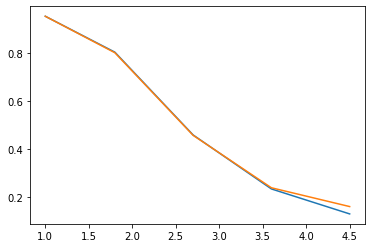

In [26]:
plt.plot(h_max,m_n_ml)
plt.plot(h_max,m_n_dft)
plt.show()